In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
df = pd.read_csv("drive/MyDrive/Datasets/FIFA 2018 Statistics.csv")
df.head()

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,...,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,...,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,...,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,...,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,...,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0


In [80]:
df.drop(['Date', 'Team', 'Opponent', 'Round'], axis=1, inplace=True)

In [81]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("numerical cols:", numerical_cols)
print("categorical cols:", categorical_cols)

numerical cols: ['Goal Scored', 'Ball Possession %', 'Attempts', 'On-Target', 'Off-Target', 'Blocked', 'Corners', 'Offsides', 'Free Kicks', 'Saves', 'Pass Accuracy %', 'Passes', 'Distance Covered (Kms)', 'Fouls Committed', 'Yellow Card', 'Yellow & Red', 'Red', '1st Goal', 'Goals in PSO', 'Own goals', 'Own goal Time']
categorical cols: ['Man of the Match', 'PSO']


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Goal Scored             128 non-null    int64  
 1   Ball Possession %       128 non-null    int64  
 2   Attempts                128 non-null    int64  
 3   On-Target               128 non-null    int64  
 4   Off-Target              128 non-null    int64  
 5   Blocked                 128 non-null    int64  
 6   Corners                 128 non-null    int64  
 7   Offsides                128 non-null    int64  
 8   Free Kicks              128 non-null    int64  
 9   Saves                   128 non-null    int64  
 10  Pass Accuracy %         128 non-null    int64  
 11  Passes                  128 non-null    int64  
 12  Distance Covered (Kms)  128 non-null    int64  
 13  Fouls Committed         128 non-null    int64  
 14  Yellow Card             128 non-null    in

In [83]:
df.describe()

,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,...,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,1st Goal,Goals in PSO,Own goals,Own goal Time
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,...,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,94.000000,128.000000,12.0,12.000000
mean,1.320312,49.992188,12.593750,3.914062,5.273438,3.359375,4.718750,1.343750,14.890625,2.726562,...,462.648438,106.664062,13.546875,1.695312,0.015625,0.015625,39.457447,0.203125,1.0,45.833333
std,1.156519,10.444074,5.245827,2.234403,2.409675,2.403195,2.446072,1.193404,4.724262,2.049447,...,151.186311,11.749537,4.619131,1.325454,0.124507,0.124507,24.496506,0.807049,0.0,29.978275
min,0.000000,25.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,...,189.000000,80.000000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0,12.000000
25%,0.000000,42.000000,9.000000,2.000000,4.000000,1.750000,3.000000,0.000000,11.000000,1.000000,...,351.000000,101.000000,10.000000,1.000000,0.000000,0.000000,18.250000,0.000000,1.0,21.750000
50%,1.000000,50.000000,12.000000,3.500000,5.000000,3.000000,5.000000,1.000000,15.000000,2.000000,...,462.000000,104.500000,13.000000,2.000000,0.000000,0.000000,39.000000,0.000000,1.0,35.000000
75%,2.000000,58.000000,15.000000,5.000000,7.000000,4.000000,6.000000,2.000000,18.000000,4.000000,...,555.250000,109.000000,16.000000,2.000000,0.000000,0.000000,54.750000,0.000000,1.0,75.750000
max,6.000000,75.000000,26.000000,12.000000,11.000000,10.000000,11.000000,5.000000,26.000000,9.000000,...,1137.000000,148.000000,25.000000,6.000000,1.000000,1.000000,90.000000,4.000000,1.0,90.000000


In [84]:
df['1st Goal'].fillna(0, inplace=True)
df['Own goals'].fillna(0, inplace=True)
df['Own goal Time'].fillna(0, inplace=True)

In [85]:
df.isnull().sum()

Goal Scored               0
Ball Possession %         0
Attempts                  0
On-Target                 0
Off-Target                0
Blocked                   0
Corners                   0
Offsides                  0
Free Kicks                0
Saves                     0
Pass Accuracy %           0
Passes                    0
Distance Covered (Kms)    0
Fouls Committed           0
Yellow Card               0
Yellow & Red              0
Red                       0
Man of the Match          0
1st Goal                  0
PSO                       0
Goals in PSO              0
Own goals                 0
Own goal Time             0
dtype: int64

In [86]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in categorical_cols:
  df[i] = le.fit_transform(df[i])

In [87]:
X = df.drop(['Man of the Match'], axis=1)
y = df['Man of the Match']

In [91]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(X)

X = pd.DataFrame(X)
X.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,3.194193,-0.960492,0.077747,1.386528,-0.947169,-0.150128,0.525857,1.393290,-0.826777,-1.335617,...,0.968590,1.837216,-1.284069,-0.125988,-0.125988,-0.624200,-0.258199,-0.252677,-0.321634,-0.268708
1,-1.146112,0.961994,-1.261890,-1.758609,-0.947169,-0.150128,-1.115843,-0.289173,2.148293,-0.355909,...,-0.142184,-0.770884,-1.284069,-0.125988,-0.125988,-1.065419,-0.258199,-0.252677,-0.321634,-0.268708
2,-1.146112,-0.672119,-0.879137,-0.410693,-0.947169,-0.567876,-1.936693,-0.289173,-1.676797,0.133944,...,0.455925,-0.336200,0.230777,-0.125988,-0.125988,-1.065419,-0.258199,-0.252677,-0.321634,-0.268708
3,-0.278051,0.673621,0.269124,0.038612,0.302704,0.267620,0.115432,-0.289173,-0.401767,0.133944,...,0.370481,-1.640250,-1.284069,-0.125988,-0.125988,2.206961,-0.258199,-0.252677,-0.321634,-0.268708
4,-1.146112,1.346491,0.077747,-0.410693,0.302704,0.267620,0.115432,-1.130405,-0.189262,-0.355909,...,-0.483961,1.837216,-0.526646,-0.125988,-0.125988,-1.065419,-0.258199,-0.252677,3.109126,5.359495


In [92]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [93]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [94]:
y_pred = lr.predict(X_test)

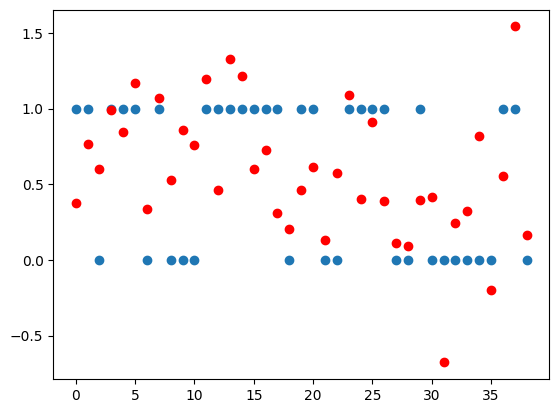

In [95]:
plt.scatter(np.arange(len(y_test)), y_test)
plt.scatter(np.arange(len(y_pred)), y_pred, c='r')

In [96]:
from sklearn.metrics import r2_score, mean_squared_error

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print(f"Mean squared error: {mse:.2f}")
print(f"Root mean squared error: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean squared error: 0.20
Root mean squared error: 0.45
R-squared: 0.19
